In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [241]:
data=pd.read_csv("data_clean.csv")

In [242]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [243]:
data.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S
157,158,18.0,131.0,8.0,76,9,29,2010,76,C


# data type conversion

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [246]:
data['Temp C'].unique()

array(['67', '72', '74', '62', '56', '66', '65', '59', '61', '69', 'C',
       '68', '58', '64', '57', '73', '81', '79', '76', '78', '84', '85',
       '82', '87', '90', '93', '92', '80', '77', '75', '83', '88', '89',
       '91', '86', '97', '94', '96', '71', '63', '70'], dtype=object)

In [247]:
data.Month.unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [248]:
data.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [249]:
data.Month=pd.to_numeric(data.Month,errors="coerce")
data["Temp C"]=pd.to_numeric(data['Temp C'],errors="coerce")
data.Weather=data.Weather.astype("category")
data.Wind=data.Wind.astype("int64")

In [250]:
data.dtypes

Unnamed: 0       int64
Ozone          float64
Solar.R        float64
Wind             int64
Temp C         float64
Month          float64
Day              int64
Year             int64
Temp             int64
Weather       category
dtype: object

In [251]:
data.Year.unique()

array([2010], dtype=int64)

# duplicates

In [253]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Length: 158, dtype: bool

In [254]:
data[data.duplicated()]

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather


In [255]:
data[data.duplicated()].shape[0]

0

In [256]:
data[data.duplicated()].shape[1]

10

In [257]:
data.columns[data.columns.duplicated()]

Index([], dtype='object')

In [258]:
data_cleaned1=data.drop_duplicates()

In [259]:
dict1={'a':[1,2,3,3,3,5],'b':[2,3,4,3,3,6],'c':[5,6,7,3,3,6]}
df=pd.DataFrame(dict1)
print(df)
df[df.duplicated()]


   a  b  c
0  1  2  5
1  2  3  6
2  3  4  7
3  3  3  3
4  3  3  3
5  5  6  6


,a,b,c
4,3,3,3


In [260]:
df1=df.drop_duplicates()

In [261]:
df1

,a,b,c
0,1,2,5
1,2,3,6
2,3,4,7
3,3,3,3
5,5,6,6


In [262]:
df1.reset_index()

,index,a,b,c
0,0,1,2,5
1,1,2,3,6
2,2,3,4,7
3,3,3,3,3
4,5,5,6,6


In [263]:
df.drop_duplicates(inplace=True)

In [264]:
df


,a,b,c
0,1,2,5
1,2,3,6
2,3,4,7
3,3,3,3
5,5,6,6


In [265]:
data_cleaned1.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7,67.0,5.0,1,2010,67,S
1,2,36.0,118.0,8,72.0,5.0,2,2010,72,C
2,3,12.0,149.0,12,74.0,5.0,3,2010,74,PS
3,4,18.0,313.0,11,62.0,5.0,4,2010,62,S
4,5,NaN,NaN,14,56.0,5.0,5,2010,56,S


In [266]:
data_cleaned1.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,154,41.0,190.0,7,67.0,5.0,1,2010,67,C
154,155,30.0,193.0,6,70.0,9.0,26,2010,70,PS
155,156,NaN,145.0,13,77.0,9.0,27,2010,77,S
156,157,14.0,191.0,14,75.0,9.0,28,2010,75,S
157,158,18.0,131.0,8,76.0,9.0,29,2010,76,C


In [267]:
data_cleaned1.reset_index(inplace=True)
data_cleaned1

,index,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,0,1,41.0,190.0,7,67.0,5.0,1,2010,67,S
1,1,2,36.0,118.0,8,72.0,5.0,2,2010,72,C
2,2,3,12.0,149.0,12,74.0,5.0,3,2010,74,PS
3,3,4,18.0,313.0,11,62.0,5.0,4,2010,62,S
4,4,5,NaN,NaN,14,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...,...
153,153,154,41.0,190.0,7,67.0,5.0,1,2010,67,C
154,154,155,30.0,193.0,6,70.0,9.0,26,2010,70,PS
155,155,156,NaN,145.0,13,77.0,9.0,27,2010,77,S
156,156,157,14.0,191.0,14,75.0,9.0,28,2010,75,S


# drop columns

In [269]:
data_cleaned1.drop(['Unnamed: 0','index','Temp C','Year'],axis=1,inplace=True)


In [270]:
data_cleaned1

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7,5.0,1,67,S
1,36.0,118.0,8,5.0,2,72,C
2,12.0,149.0,12,5.0,3,74,PS
3,18.0,313.0,11,5.0,4,62,S
4,NaN,NaN,14,5.0,5,56,S
...,...,...,...,...,...,...,...
153,41.0,190.0,7,5.0,1,67,C
154,30.0,193.0,6,9.0,26,70,PS
155,NaN,145.0,13,9.0,27,77,S
156,14.0,191.0,14,9.0,28,75,S


# rename colmns

In [272]:
data_cleaned1.rename({'Solar.R':'Solar','Temp':'Temperature'},axis=1,inplace=True)

In [273]:
data_cleaned1

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,41.0,190.0,7,5.0,1,67,S
1,36.0,118.0,8,5.0,2,72,C
2,12.0,149.0,12,5.0,3,74,PS
3,18.0,313.0,11,5.0,4,62,S
4,NaN,NaN,14,5.0,5,56,S
...,...,...,...,...,...,...,...
153,41.0,190.0,7,5.0,1,67,C
154,30.0,193.0,6,9.0,26,70,PS
155,NaN,145.0,13,9.0,27,77,S
156,14.0,191.0,14,9.0,28,75,S


# missing valus and imputation

In [275]:
data_cleaned1.isnull()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False
155,True,False,False,False,False,False,False
156,False,False,False,False,False,False,False


In [276]:
data_cleaned1.notnull()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...
153,True,True,True,True,True,True,True
154,True,True,True,True,True,True,True
155,False,True,True,True,True,True,True
156,True,True,True,True,True,True,True


In [277]:
data_cleaned1.isnull().sum()

Ozone          38
Solar           7
Wind            0
Month           1
Day             0
Temperature     0
Weather         3
dtype: int64

In [278]:
data_cleaned1.isnull().sum().sum()

49

In [279]:
import seaborn as sns 
sns.color_palette('Set1')

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [280]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [281]:
sns.color_palette('Set3')

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [282]:
sns.color_palette('winter')

[(0.0, 0.1411764705882353, 0.9294117647058824),
 (0.0, 0.28627450980392155, 0.8568627450980393),
 (0.0, 0.42745098039215684, 0.7862745098039216),
 (0.0, 0.5725490196078431, 0.7137254901960784),
 (0.0, 0.7137254901960784, 0.6431372549019607),
 (0.0, 0.8588235294117647, 0.5705882352941176)]

In [283]:
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [284]:
import seaborn 
help(seaborn.palettes)

Help on module seaborn.palettes in seaborn:

NAME
    seaborn.palettes

FUNCTIONS
    blend_palette(colors, n_colors=6, as_cmap=False, input='rgb')
        Make a palette that blends between a list of colors.

        Parameters
        ----------
        colors : sequence of colors in various formats interpreted by `input`
            hex code, html color name, or tuple in `input` space.
        n_colors : int, optional
            Number of colors in the palette.
        as_cmap : bool, optional
            If True, return a :class:`matplotlib.colors.ListedColormap`.

        Returns
        -------
        palette
            list of RGB tuples or :class:`matplotlib.colors.ListedColormap`

        Examples
        --------
        .. include: ../docstrings/blend_palette.rst

    color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)
        Return a list of colors or continuous colormap defining a palette.

        Possible ``palette`` values include:
            - Na

<Axes: >

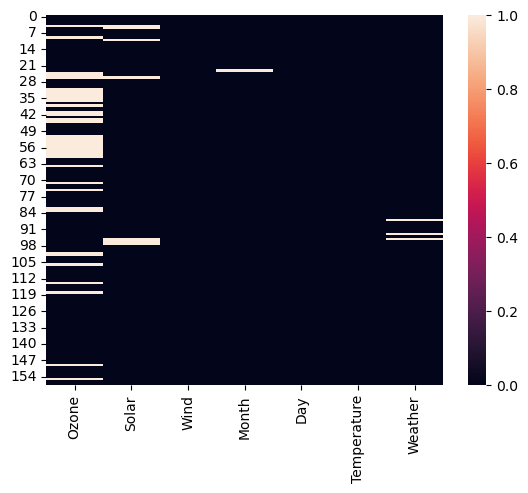

In [285]:
import seaborn as sns
cols=data_cleaned1.columns
sns.heatmap(data_cleaned1[cols].isnull())

<Axes: >

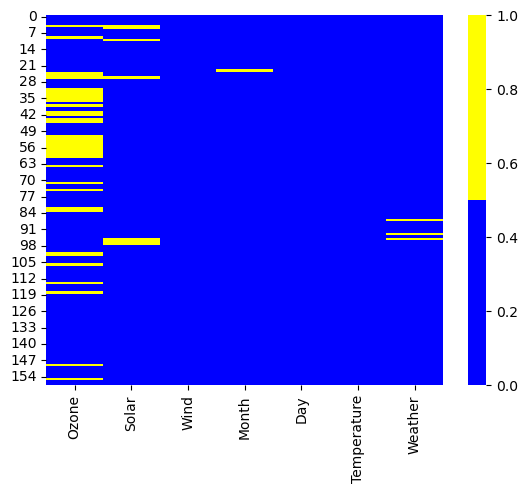

In [286]:
import seaborn as sns 
cols=data_cleaned1.columns
colours=['blue','yellow']  # yellow is missing,blue is not missig
sns.heatmap(data_cleaned1[cols].isna(),cmap=colours)

<Axes: >

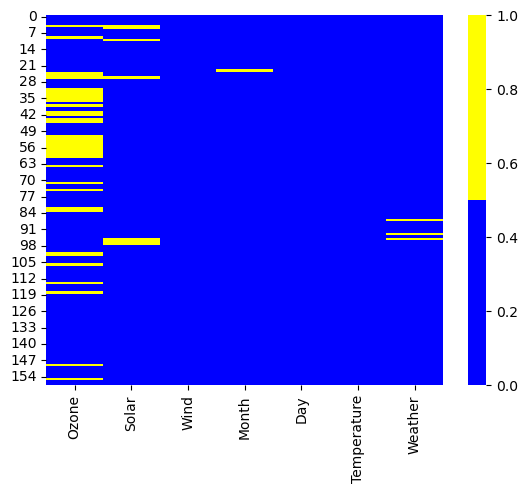

In [287]:
import seaborn as sns
cols=data_cleaned1.columns
colours=['blue','yellow']
sns.heatmap(data_cleaned1[cols].isnull(),cmap=colours)

In [288]:
data_cleaned1[data_cleaned1.isnull().any(axis=1)]   #those records only with null values

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
4,NaN,NaN,14,5.0,5,56,S
5,28.0,NaN,14,5.0,6,66,C
9,NaN,194.0,8,5.0,10,69,S
10,7.0,NaN,6,5.0,11,74,C
23,32.0,92.0,12,NaN,24,61,C
24,NaN,66.0,16,5.0,25,57,PS
25,NaN,266.0,14,5.0,26,58,C
26,NaN,NaN,8,5.0,27,57,PS
31,NaN,286.0,8,6.0,1,78,S
32,NaN,287.0,9,6.0,2,74,C


In [289]:
data_cleaned2=data_cleaned1.dropna()

In [290]:
data_cleaned2.reset_index(inplace=True)

In [291]:
data_cleaned2.shape

(112, 8)

In [292]:
data_cleaned2.isnull().sum()

index          0
Ozone          0
Solar          0
Wind           0
Month          0
Day            0
Temperature    0
Weather        0
dtype: int64

# for imputation methods , first check if there is OUTLIERS.
#  if there is outliers go for median imputation else use mean imutation
#   also if the datatype is category go for MODE

In [294]:
data_cleaned1.dtypes

Ozone           float64
Solar           float64
Wind              int64
Month           float64
Day               int64
Temperature       int64
Weather        category
dtype: object

<Axes: >

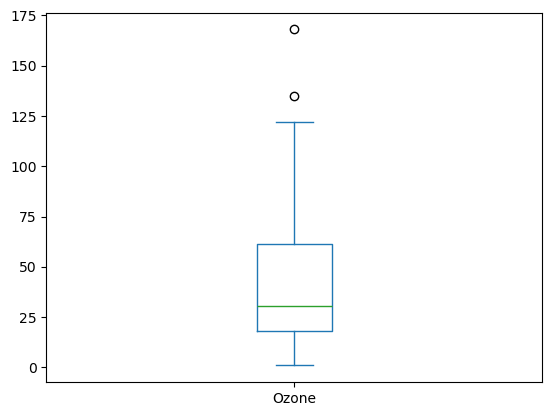

In [295]:
data_cleaned1.Ozone.plot(kind="box")

<Axes: >

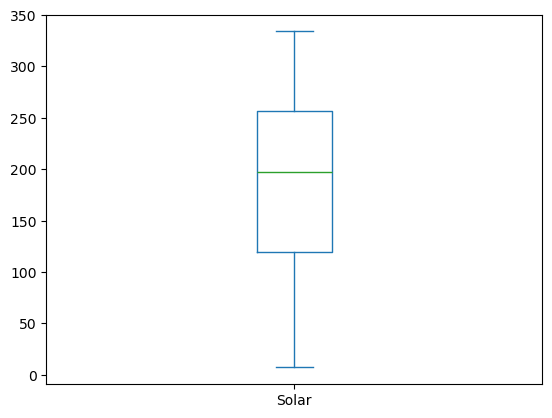

In [296]:
data_cleaned1.Solar.plot(kind='box')

In [297]:
ozone_median=data_cleaned1.Ozone.median()
print(ozone_median)
data_cleaned1.Ozone=data_cleaned1.Ozone.fillna(ozone_median)

30.5


In [298]:
solar_mean=data_cleaned1.Solar.mean()
print(solar_mean)
data_cleaned1.Solar=data_cleaned1.Solar.fillna(solar_mean)

185.40397350993376


In [299]:
data_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Ozone        158 non-null    float64 
 1   Solar        158 non-null    float64 
 2   Wind         158 non-null    int64   
 3   Month        157 non-null    float64 
 4   Day          158 non-null    int64   
 5   Temperature  158 non-null    int64   
 6   Weather      155 non-null    category
dtypes: category(1), float64(3), int64(3)
memory usage: 7.8 KB


In [300]:
data_cleaned1.isnull().sum()

Ozone          0
Solar          0
Wind           0
Month          1
Day            0
Temperature    0
Weather        3
dtype: int64

In [301]:
mode_weather=data_cleaned1.Weather.mode()[0]
mode_weather

'S'

In [302]:
data_cleaned1.Weather=data_cleaned1.Weather.fillna(mode_weather)

In [303]:
data_cleaned1.isnull().sum()

Ozone          0
Solar          0
Wind           0
Month          1
Day            0
Temperature    0
Weather        0
dtype: int64

In [304]:
data_cleaned1.dropna(inplace=True)

In [305]:
data_cleaned1.isnull().sum()

Ozone          0
Solar          0
Wind           0
Month          0
Day            0
Temperature    0
Weather        0
dtype: int64

In [306]:
data_cleaned1

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,41.0,190.000000,7,5.0,1,67,S
1,36.0,118.000000,8,5.0,2,72,C
2,12.0,149.000000,12,5.0,3,74,PS
3,18.0,313.000000,11,5.0,4,62,S
4,30.5,185.403974,14,5.0,5,56,S
...,...,...,...,...,...,...,...
153,41.0,190.000000,7,5.0,1,67,C
154,30.0,193.000000,6,9.0,26,70,PS
155,30.5,145.000000,13,9.0,27,77,S
156,14.0,191.000000,14,9.0,28,75,S


# outlier detection and treatment

# capping and Flooring
# replacing all the upper values with the Upper Extreme
# and replacing all the lower values with the Lower EXTREME

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff0edceea0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff0edcdfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff0edcf350>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff0edce960>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff0edcdd00>],
 'means': []}

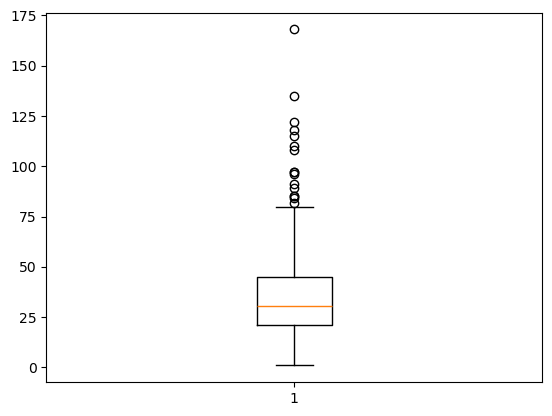

In [309]:
box=plt.boxplot(data_cleaned1.Ozone)
box

In [310]:
for i,j in box.items():
    print(i,j)

whiskers [<matplotlib.lines.Line2D object at 0x000001FF0EDCEEA0>, <matplotlib.lines.Line2D object at 0x000001FF0EDCE9F0>]
caps [<matplotlib.lines.Line2D object at 0x000001FF0EDCDFA0>, <matplotlib.lines.Line2D object at 0x000001FF0EDCE450>]
boxes [<matplotlib.lines.Line2D object at 0x000001FF0EDCF350>]
medians [<matplotlib.lines.Line2D object at 0x000001FF0EDCE960>]
fliers [<matplotlib.lines.Line2D object at 0x000001FF0EDCDD00>]
means []


In [311]:
# caps  --|---- extremes
#filers ------ outliers

In [312]:
out=[]
for items in box['fliers']:
    out.append(items.get_ydata())

out

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

In [313]:
ext=[]

for ex in box['caps']:
    ext.append(ex.get_ydata()[1])

ext

[1.0, 80.0]

In [314]:
[items.get_ydata() for items in box["fliers"]]

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

In [315]:
[ext.get_ydata()[1] for ext in box['caps']]

[1.0, 80.0]

In [316]:
data_cleaned1.loc[(data_cleaned1.Ozone<1)| (data_cleaned1.Ozone > 80)]

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
29,115.0,223.0,5,5.0,30,79,C
61,135.0,269.0,4,7.0,1,84,S
68,97.0,267.0,6,7.0,8,92,PS
69,97.0,272.0,5,7.0,9,92,C
70,85.0,175.0,7,7.0,10,89,PS
85,108.0,223.0,8,7.0,25,85,PS
88,82.0,213.0,7,7.0,28,88,S
98,122.0,255.0,4,8.0,7,89,C
99,89.0,229.0,10,8.0,8,90,PS
100,110.0,207.0,8,8.0,9,90,C


In [317]:
data_cleaned1.loc[data_cleaned1.Ozone>80,"Ozone"]

29     115.0
61     135.0
68      97.0
69      97.0
70      85.0
85     108.0
88      82.0
98     122.0
99      89.0
100    110.0
116    168.0
120    118.0
121     84.0
122     85.0
123     96.0
126     91.0
Name: Ozone, dtype: float64

In [318]:
data_cleaned1.loc[data_cleaned1.Ozone>80,"Ozone"]=80

<Axes: >

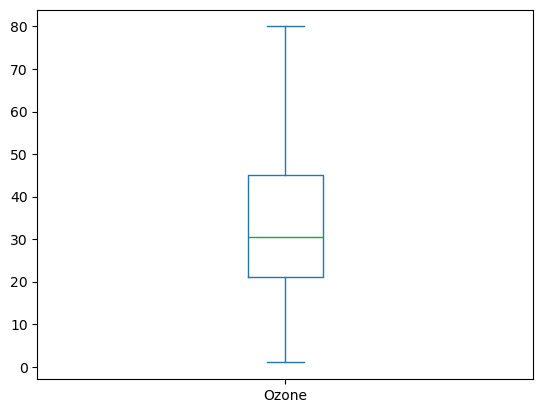

In [319]:
data_cleaned1.Ozone.plot(kind="box")

In [320]:
data_cleaned1.describe()

,Ozone,Solar,Wind,Month,Day,Temperature
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,36.401274,185.998903,9.464968,7.044586,15.955414,77.834395
std,22.376473,86.676102,3.489046,1.433768,9.003093,9.311454
min,1.000000,7.000000,1.000000,5.000000,1.000000,56.000000
25%,21.000000,127.000000,7.000000,6.000000,8.000000,72.000000
50%,30.500000,193.000000,9.000000,7.000000,16.000000,79.000000
75%,45.000000,255.000000,11.000000,8.000000,24.000000,84.000000
max,80.000000,334.000000,20.000000,9.000000,31.000000,97.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1ff0bf87a70>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff0c83e840>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff0c9d3dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff0ebd9790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff0ebd9370>],
 'means': []}

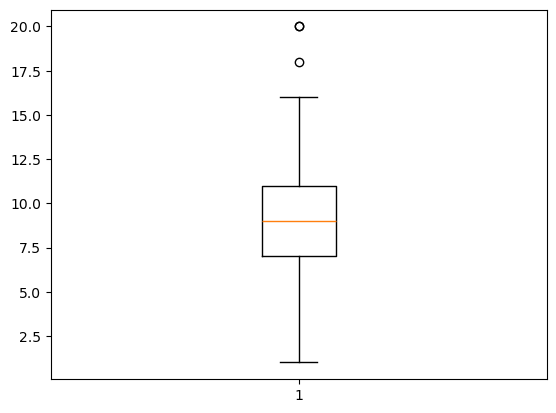

In [321]:
box_wind=plt.boxplot(data_cleaned1.Wind)
box_wind

In [322]:
[items.get_ydata() for items in box_wind["fliers"]]

[array([20, 18, 20], dtype=int64)]

In [323]:
[items.get_ydata()[1] for items in box_wind["caps"]]

[1, 16]

In [324]:
extremes=[items.get_ydata()[1] for items in box_wind['whiskers']]

In [325]:
LE=extremes[0]
UE=extremes[1]
print(UE,LE)

16.0 1.0


In [327]:
data_cleaned1.loc[data_cleaned1.Wind>16]=16

<function matplotlib.pyplot.show(close=None, block=None)>

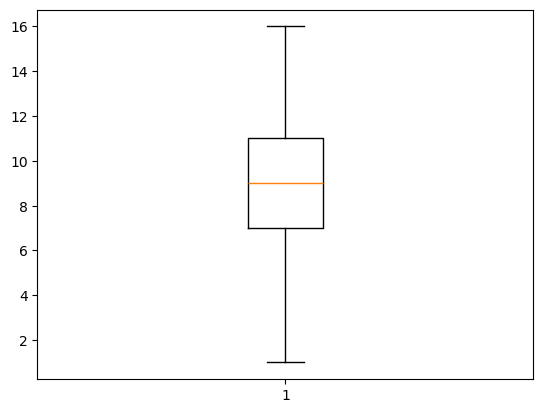

In [329]:
plt.boxplot(data_cleaned1.Wind)
plt.show

In [ ]:
## 

# Scatter plot and Correlation

In [ ]:
# scatter plot gives visualized ralationship between 2 variables(continuous)

In [ ]:
# correlation --degree of relation between continuous variables (linear relationship)

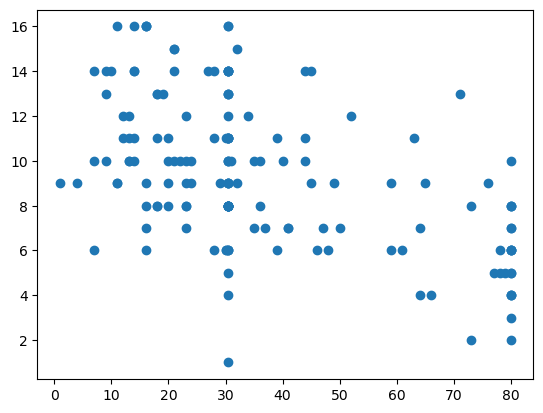

In [331]:
plt.scatter(data_cleaned1.Ozone,data_cleaned1.Wind)

<function matplotlib.pyplot.show(close=None, block=None)>

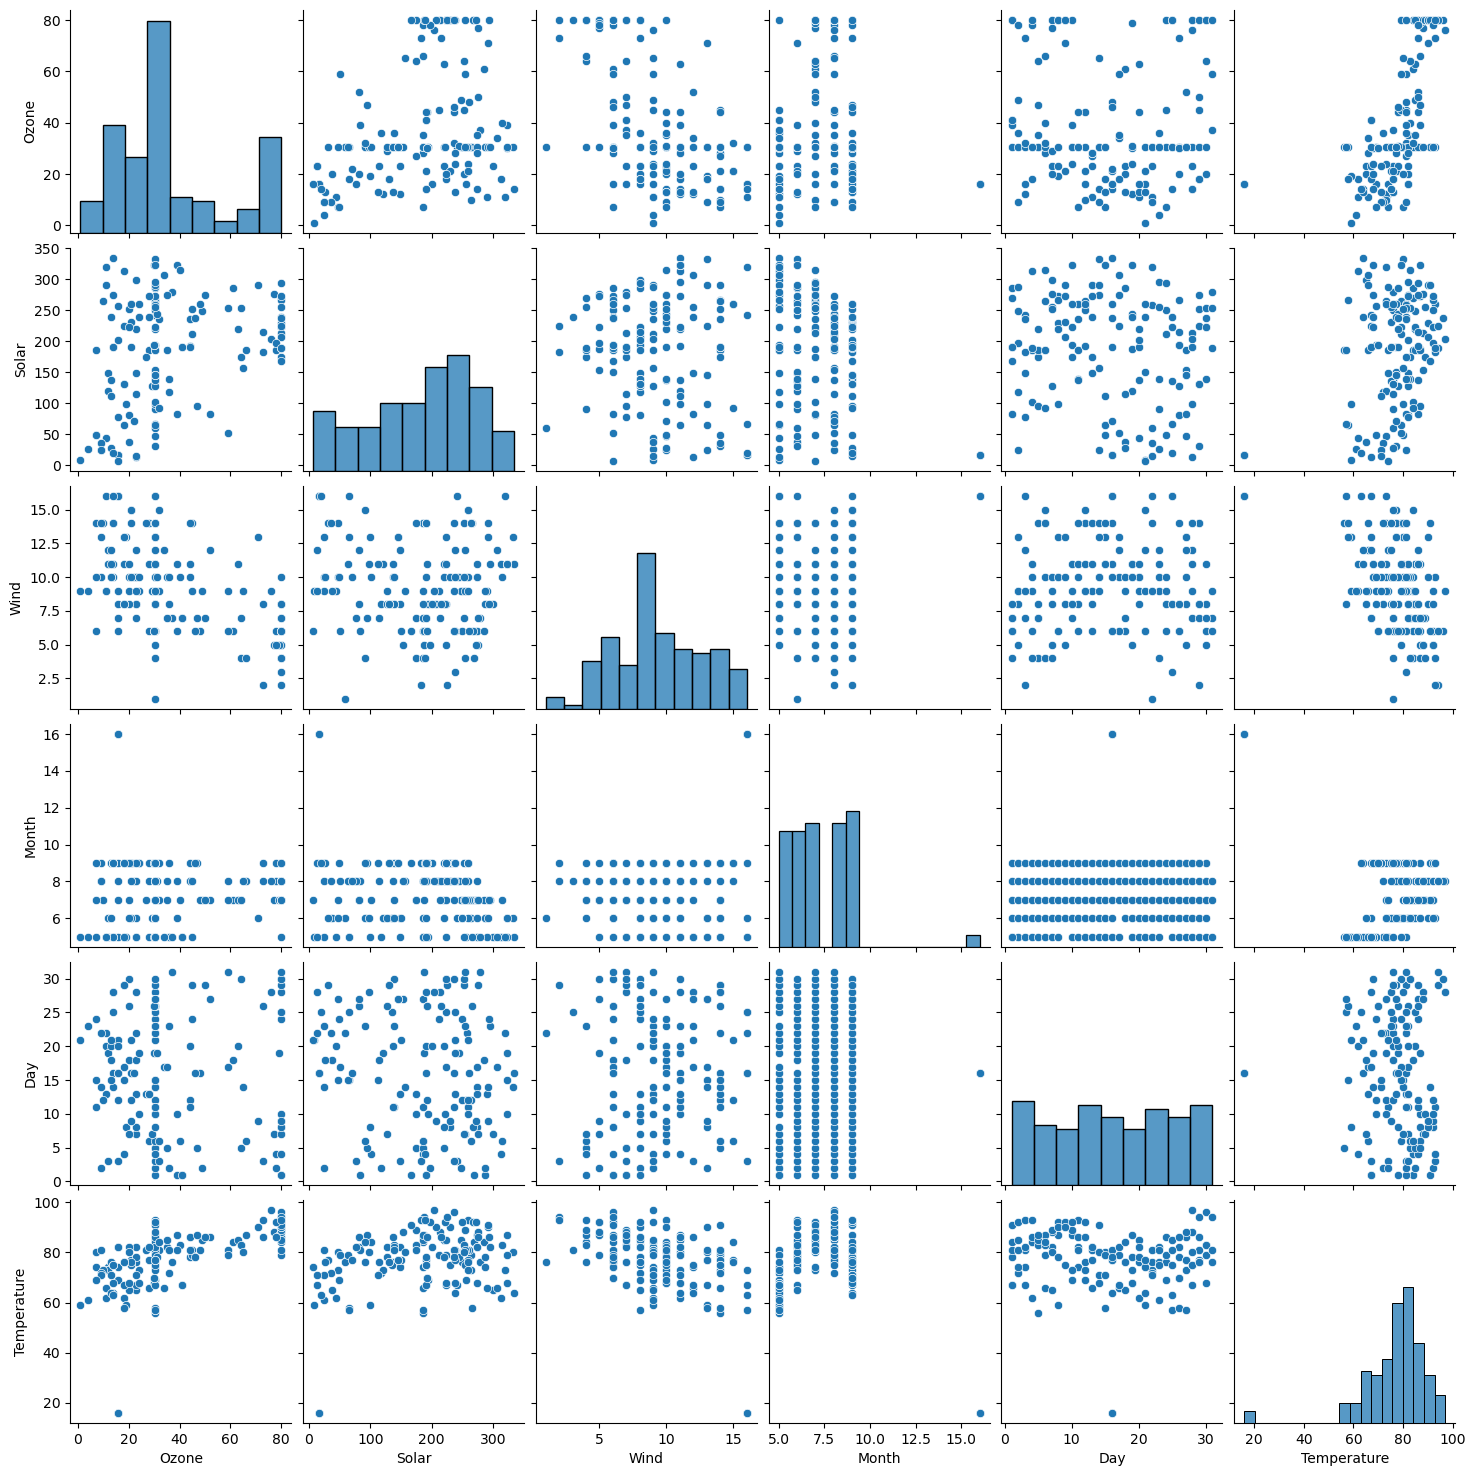

In [333]:
import seaborn as sns
sns.pairplot(data_cleaned1)
plt.show

In [334]:
# correlation

In [335]:
df_num=data_cleaned1.select_dtypes('number')
df_num.corr(method="pearson")

,Ozone,Solar,Wind,Month,Day,Temperature
Ozone,1.000000,0.320222,-0.525089,0.031215,-0.055667,0.562366
Solar,0.320222,1.000000,-0.098789,-0.261007,-0.151031,0.342217
Wind,-0.525089,-0.098789,1.000000,0.110469,0.063434,-0.470969
Month,0.031215,-0.261007,0.110469,1.000000,0.043791,-0.247150
Day,-0.055667,-0.151031,0.063434,0.043791,1.000000,-0.091143
Temperature,0.562366,0.342217,-0.470969,-0.247150,-0.091143,1.000000


<Axes: >

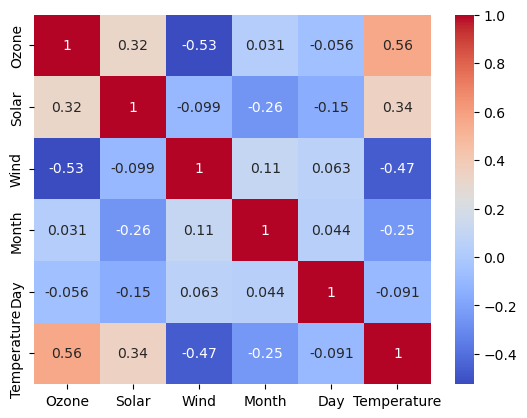

In [336]:
sns.heatmap(df_num.corr(),annot=True,cmap="coolwarm")

# Transformation

## 1.dummy variable

In [339]:
data_cleaned1

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,41.0,190.000000,7,5.0,1,67,S
1,36.0,118.000000,8,5.0,2,72,C
2,12.0,149.000000,12,5.0,3,74,PS
3,18.0,313.000000,11,5.0,4,62,S
4,30.5,185.403974,14,5.0,5,56,S
...,...,...,...,...,...,...,...
153,41.0,190.000000,7,5.0,1,67,C
154,30.0,193.000000,6,9.0,26,70,PS
155,30.5,145.000000,13,9.0,27,77,S
156,14.0,191.000000,14,9.0,28,75,S


### categorical variables have to be converted to numerical (one hot encoding,label encoding)

In [341]:
import pandas as pd 
data_cleaned1=pd.get_dummies(data_cleaned1,dtype=int)
data_cleaned1

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
0,41.0,190.000000,7,5.0,1,67,0,0,1
1,36.0,118.000000,8,5.0,2,72,1,0,0
2,12.0,149.000000,12,5.0,3,74,0,1,0
3,18.0,313.000000,11,5.0,4,62,0,0,1
4,30.5,185.403974,14,5.0,5,56,0,0,1
...,...,...,...,...,...,...,...,...,...
153,41.0,190.000000,7,5.0,1,67,1,0,0
154,30.0,193.000000,6,9.0,26,70,0,1,0
155,30.5,145.000000,13,9.0,27,77,0,0,1
156,14.0,191.000000,14,9.0,28,75,0,0,1


### 2.feature scaling -- NORMALIZATION AND STANDARDIZATION

## standardization

In [344]:
def get_stand(x):
    return((x-x.mean())/x.std())

In [345]:
# x=pd.Series([1500,1000,1200,1350,4400,500,300,200])

# get_stand(x)

In [346]:
stand_data=get_stand(data_cleaned1)

In [347]:
stand_data.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
0,0.207011,0.069548,-0.720718,-1.202582,-1.667519,-0.798646,-0.661485,-0.651576,1.233896
1,-0.017132,-0.748377,-0.420578,-1.202582,-1.556209,-0.396505,1.502122,-0.651576,-0.805279
2,-1.093016,-0.396215,0.779981,-1.202582,-1.444900,-0.235649,-0.661485,1.524965,-0.805279
3,-0.824045,1.466835,0.479841,-1.202582,-1.333590,-1.200786,-0.661485,-0.651576,1.233896
4,-0.263689,0.017336,1.380260,-1.202582,-1.222280,-1.683354,-0.661485,-0.651576,1.233896


## normalisation

In [349]:
def get_norm(x):
    return((x-x.min())/(x.max()-x.min()))

In [350]:
# x=pd.Series([1500,1000,1200,1350,4400,500,300,200])

# get_norm(x)

In [351]:
norm_data=get_norm(data_cleaned1)

In [352]:
norm_data.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
0,0.506329,0.559633,0.400000,0.0,0.000000,0.629630,0.0,0.0,1.0
1,0.443038,0.339450,0.466667,0.0,0.033333,0.691358,1.0,0.0,0.0
2,0.139241,0.434251,0.733333,0.0,0.066667,0.716049,0.0,1.0,0.0
3,0.215190,0.935780,0.666667,0.0,0.100000,0.567901,0.0,0.0,1.0
4,0.373418,0.545578,0.866667,0.0,0.133333,0.493827,0.0,0.0,1.0


#### using pre defined functions

In [354]:
data_cleaned1.values

array([[ 41. , 190. ,   7. , ...,   0. ,   0. ,   1. ],
       [ 36. , 118. ,   8. , ...,   1. ,   0. ,   0. ],
       [ 12. , 149. ,  12. , ...,   0. ,   1. ,   0. ],
       ...,
       [ 30.5, 145. ,  13. , ...,   0. ,   0. ,   1. ],
       [ 14. , 191. ,  14. , ...,   0. ,   0. ,   1. ],
       [ 18. , 131. ,   8. , ...,   1. ,   0. ,   0. ]])

In [355]:
from sklearn.preprocessing import MinMaxScaler
array=data_cleaned1.values

scaler=MinMaxScaler()
rescaledX=scaler.fit_transform(array)

In [356]:
print(pd.DataFrame(rescaledX))

            0         1         2         3         4         5    6    7    8
0    0.506329  0.559633  0.400000  0.000000  0.000000  0.629630  0.0  0.0  1.0
1    0.443038  0.339450  0.466667  0.000000  0.033333  0.691358  1.0  0.0  0.0
2    0.139241  0.434251  0.733333  0.000000  0.066667  0.716049  0.0  1.0  0.0
3    0.215190  0.935780  0.666667  0.000000  0.100000  0.567901  0.0  0.0  1.0
4    0.373418  0.545578  0.866667  0.000000  0.133333  0.493827  0.0  0.0  1.0
..        ...       ...       ...       ...       ...       ...  ...  ...  ...
152  0.506329  0.559633  0.400000  0.000000  0.000000  0.629630  1.0  0.0  0.0
153  0.367089  0.568807  0.333333  0.363636  0.833333  0.666667  0.0  1.0  0.0
154  0.373418  0.422018  0.800000  0.363636  0.866667  0.753086  0.0  0.0  1.0
155  0.164557  0.562691  0.866667  0.363636  0.900000  0.728395  0.0  0.0  1.0
156  0.215190  0.379205  0.466667  0.363636  0.933333  0.740741  1.0  0.0  0.0

[157 rows x 9 columns]


In [357]:
from sklearn.preprocessing import StandardScaler
array=data_cleaned1.values

scaler=StandardScaler()
rescaledx=scaler.fit_transform(array)

In [358]:
print(pd.DataFrame(rescaledx))

            0         1         2         3         4         5         6  \
0    0.207673  0.069770 -0.723024 -1.206431 -1.672855 -0.801201 -0.663602   
1   -0.017187 -0.750772 -0.421924 -1.206431 -1.561189 -0.397774  1.506928   
2   -1.096514 -0.397483  0.782477 -1.206431 -1.449523 -0.236403 -0.663602   
3   -0.826682  1.471529  0.481377 -1.206431 -1.337857 -1.204628 -0.663602   
4   -0.264533  0.017392  1.384677 -1.206431 -1.226192 -1.688741 -0.663602   
..        ...       ...       ...       ...       ...       ...       ...   
152  0.207673  0.069770 -0.723024 -1.206431 -1.672855 -0.801201  1.506928   
153 -0.287019  0.103959 -1.024124  0.939854  1.118793 -0.559145 -0.663602   
154 -0.264533 -0.443068  1.083577  0.939854  1.230459  0.005653 -0.663602   
155 -1.006570  0.081167  1.384677  0.939854  1.342125 -0.155718 -0.663602   
156 -0.826682 -0.602618 -0.421924  0.939854  1.453791 -0.075032  1.506928   

            7         8  
0   -0.653661  1.237844  
1   -0.653661 -0.807856

In [359]:
print(rescaledx[0:5,:])

[[ 0.20767307  0.06977016 -0.72302401 -1.20643051 -1.67285527 -0.80120119
  -0.66360152 -0.65366102  1.23784412]
 [-0.01718674 -0.75077162 -0.42192383 -1.20643051 -1.56118933 -0.39777404
   1.50692844 -0.65366102 -0.80785616]
 [-1.09651381 -0.3974828   0.78247691 -1.20643051 -1.4495234  -0.23640317
  -0.66360152  1.52984494 -0.80785616]
 [-0.82668204  1.47152905  0.48137673 -1.20643051 -1.33785746 -1.20462835
  -0.66360152 -0.65366102  1.23784412]
 [-0.26453253  0.01739195  1.38467728 -1.20643051 -1.22619153 -1.68874093
  -0.66360152 -0.65366102  1.23784412]]


In [387]:
import numpy as np

data_cleaned1['log_ozone']=np.log(data_cleaned1.Ozone)
data_cleaned1.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S,log_ozone
0,41.0,190.000000,7,5.0,1,67,0,0,1,3.713572
1,36.0,118.000000,8,5.0,2,72,1,0,0,3.583519
2,12.0,149.000000,12,5.0,3,74,0,1,0,2.484907
3,18.0,313.000000,11,5.0,4,62,0,0,1,2.890372
4,30.5,185.403974,14,5.0,5,56,0,0,1,3.417727


<Axes: ylabel='Frequency'>

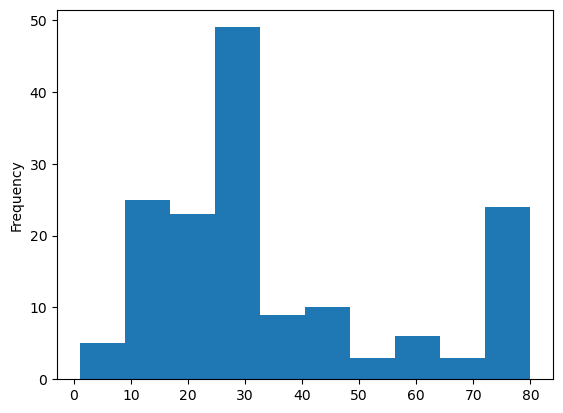

In [389]:
data_cleaned1.Ozone.plot(kind="hist")

<Axes: ylabel='Frequency'>

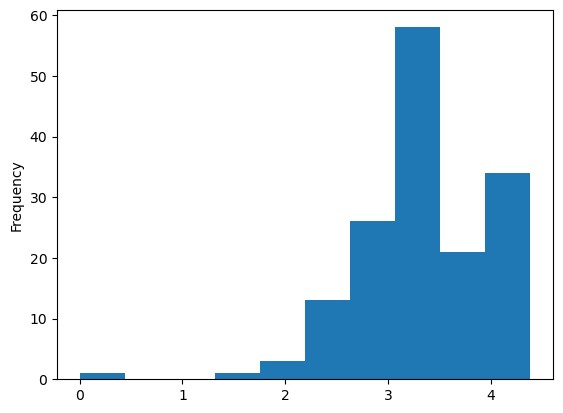

In [393]:
data_cleaned1.log_ozone.plot(kind='hist')

# speed up EDA process

## Automatic EDA

In [397]:
!pip install pandas-profiling==3.1.0
!pip install ydata_profiling

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------- ----------------------- 1.3/3.1 MB 8.4 MB/s eta 0:00:01
   ------------------------------ --------- 2.4/3.1 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 3.1/3.1 MB 6.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/666.4 kB ? eta -:--:--
   --------------------------------------- 666.4/666.4 kB 12.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=12223bb64895a4929212c8df34c30b8265bd0466e3772dfaaafa856b8b0efb8d
  Stored in directory: c:\users\user2\appdata\local\pip\cache\wheels\5f\d4\d7\4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
  Created wheel for markupsafe: filename=MarkupSafe-2.0.1-py3-none

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.12.3 requires joblib>=1.1.1, but you have joblib 1.0.1 which is incompatible.
scikit-learn 1.5.1 requires joblib>=1.2.0, but you have joblib 1.0.1 which is incompatible.
werkzeug 3.0.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


  Attempting uninstall: multimethod
    Found existing installation: multimethod 2.0
    Uninstalling multimethod-2.0:
      Successfully uninstalled multimethod-2.0
  Attempting uninstall: imagehash
    Found existing installation: ImageHash 4.3.2
    Uninstalling ImageHash-4.3.2:
      Successfully uninstalled ImageHash-4.3.2
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [399]:
import pandas as pd 
data=pd.read_csv('data_clean.csv')

In [403]:
from pandas_profiling import ProfileReport

profile=ProfileReport(data,title="EDA")

profile.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [421]:
import ydata_profiling as pp

profile=pp.ProfileReport(data,title='eda')

profile.to_file("Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 68.25it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [415]:
!pip install sweetviz

   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/15.1 MB 4.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/15.1 MB 4.2 MB/s eta 0:00:04
   ------- -------------------------------- 2.9/15.1 MB 5.1 MB/s eta 0:00:03
   ----------- ---------------------------- 4.5/15.1 MB 5.8 MB/s eta 0:00:02
   --------------- ------------------------ 6.0/15.1 MB 6.2 MB/s eta 0:00:02
   -------------------- ------------------- 7.6/15.1 MB 6.4 MB/s eta 0:00:02
   ----------------------- ---------------- 8.9/15.1 MB 6.3 MB/s eta 0:00:01
   ------------------------- -------------- 9.7/15.1 MB 6.0 MB/s eta 0:00:01
   ----------------------------- ---------- 11.0/15.1 MB 6.0 MB/s eta 0:00:01
   --------------------------------- ------ 12.6/15.1 MB 6.1 MB/s eta 0:00:01
   ------------------------------------- -- 14.2/15.1 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 15.1/15.1 MB 6.3 MB/s eta 0:00:00


In [417]:
import sweetviz as sv
sweet_report=sv.analyze(data)
sweet_report.show_html("SVreport.html")

                                             |                                             | [  0%]   00:00 ->…

Report SVreport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
